In [2]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
gdf = gpd.read_file('LA County Bikeways.geojson')

In [4]:
gdf.shape # rows and columns

(869, 53)

In [5]:
gdf.info() # data types

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cog         454 non-null    object  
 1   zip_code    64 non-null     object  
 2   community   310 non-null    object  
 3   equip       869 non-null    object  
 4   parking_co  63 non-null     object  
 5   w_buffer    869 non-null    object  
 6   city        22 non-null     object  
 7   planning_a  527 non-null    object  
 8   osd_cont_1  0 non-null      object  
 9   priority    59 non-null     object  
 10  rmd_contac  286 non-null    object  
 11  atsproject  869 non-null    object  
 12  w_parking   869 non-null    object  
 13  interim_cl  869 non-null    object  
 14  e_parking   869 non-null    object  
 15  osd_contac  0 non-null      object  
 16  phase       869 non-null    object  
 17  rmd_cont_1  286 non-null    object  
 18  plan_area   869 non-null    object  
 19  

<AxesSubplot:>

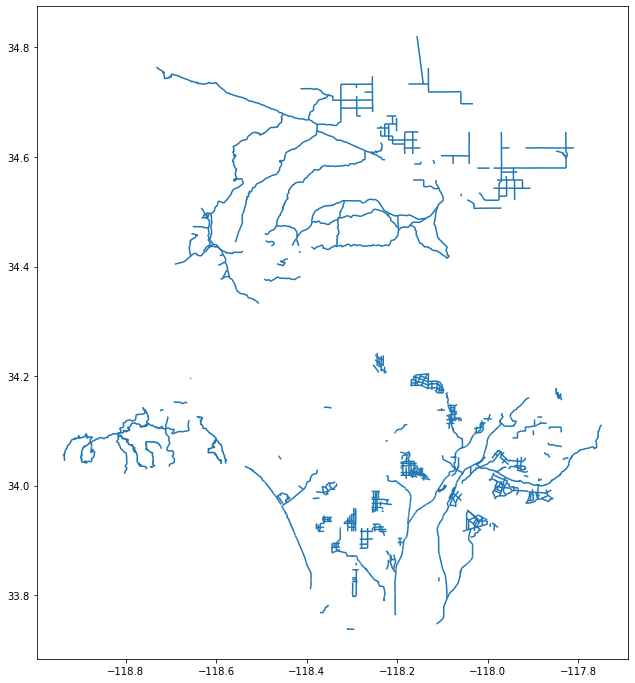

In [6]:
gdf.plot(figsize=(12,12)) # seeing bike lanes now!

In [9]:
gdf.head() # getting a look at the various columns and data

,cog,zip_code,community,equip,parking_co,w_buffer,city,planning_a,osd_cont_1,priority,...,project_na,parking,e_buffer,sd,inprojecty,piw_projec,join_id,shape_len,maintain,geometry
0,None,90631,None,0,NSAT,0,None,East San Gabriel Valley,None,None,...,None,No,0,4,None,None,xESV103_3,2197.76056308,LA County,"MULTILINESTRING ((-117.95958 33.98285, -117.96..."
1,None,None,None,0,NSAT,0,None,None,None,None,...,None,No,0,4,None,None,xESV103_1,11041.7759742,LA County,"MULTILINESTRING ((-117.94532 33.99008, -117.94..."
2,San Fernando Valley COG,None,Santa Clarita,0,None,0,None,Santa Clarita Valley,None,None,...,None,None,0,5,None,None,SCV19_0,14895.974093,Santa Clarita,"MULTILINESTRING ((-118.54072 34.42810, -118.54..."
3,San Fernando Valley COG,None,Santa Clarita,0,None,0,None,Santa Clarita Valley,None,None,...,The Old Rd over Santa Clara River & SPT CO. Br...,None,0,5,None,RDC0015749,SCV19_2,4364.5635791,None,"MULTILINESTRING ((-118.58405 34.42818, -118.58..."
4,South Bay Cities,None,West Athens / Westmont,0,None,0,None,Metro,None,None,...,2013 CFP - W Athens W Carson,None,0,2,None,None,M49_0,3086.39407465,None,"MULTILINESTRING ((-118.30903 33.93528, -118.30..."


In [13]:
gdf.sample(5) # trying to take a look at which column might be interesting to sort by

,cog,zip_code,community,equip,parking_co,w_buffer,city,planning_a,osd_cont_1,priority,...,project_na,parking,e_buffer,sd,inprojecty,piw_projec,join_id,shape_len,maintain,geometry
556,None,None,None,679603,None,0,None,None,None,None,...,None,None,0,2,None,None,xSB103_08,340.000376736,LA County,"MULTILINESTRING ((-118.28836 33.86819, -118.28..."
494,None,None,None,679513,None,0,None,None,None,None,...,None,None,0,1,None,None,xWSG110_35,2936.99868916,LA County,"MULTILINESTRING ((-117.94758 34.13222, -117.94..."
834,Central Los Angeles,None,Ladera Heights,0,None,0,None,Westside,None,None,...,None,None,0,2,None,None,W12_2,5014.12274451,None,"MULTILINESTRING ((-118.36261 33.98761, -118.36..."
497,None,91791,Valinda,0,None,0,None,East San Gabriel Valley,None,None,...,None,None,0,1,None,None,xESV106_0,2683.10658409,LA County,"MULTILINESTRING ((-117.92033 34.04473, -117.92..."
132,None,90001,Florence-Firestone,0,Y (both sides) 8',4,None,Metro,None,None,...,None,Yes,4,1,None,None,xM106_1,1164.03159389,LA County,"MULTILINESTRING ((-118.24118 33.98202, -118.24..."


In [15]:
gdf_sorted = gdf.sort_values(by='community',ascending = True) # sorting data by community

In [16]:
gdf_sorted

,cog,zip_code,community,equip,parking_co,w_buffer,city,planning_a,osd_cont_1,priority,...,project_na,parking,e_buffer,sd,inprojecty,piw_projec,join_id,shape_len,maintain,geometry
427,North Los Angeles,None,Acton,0,None,0,None,Antelope Valley,None,None,...,None,None,0,5,None,None,AV59_0,38826.0326431,None,"MULTILINESTRING ((-118.08475 34.41816, -118.08..."
254,Las Virgenes / Malibu,None,Agoura,0,None,0,None,Santa Monica Mountains,None,None,...,None,None,0,3,None,None,SMM01_0,41520.3645785,None,"MULTILINESTRING ((-118.70335 34.03474, -118.70..."
806,San Fernando Valley COG,None,Agua Dulce,0,None,0,None,Santa Clarita Valley,None,None,...,None,None,0,5,None,None,SCV18_0,34305.5817213,None,"MULTILINESTRING ((-118.33622 34.43791, -118.33..."
285,San Fernando Valley COG,None,Agua Dulce,0,None,0,None,Santa Clarita Valley,None,None,...,None,None,0,5,None,None,SCV26_0,19375.0791437,None,"MULTILINESTRING ((-118.33075 34.48547, -118.33..."
590,San Fernando Valley COG,None,Agua Dulce,0,None,0,None,Santa Clarita Valley,None,None,...,None,None,0,5,None,None,SCV12_0,36329.3222949,None,"MULTILINESTRING ((-118.32602 34.48907, -118.32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,None,None,None,0,None,0,None,None,None,None,...,Rosemead Complete Streets Interim,None,0,None,None,RDC0016284,WSG54_1,3417.30875189,None,"MULTILINESTRING ((-118.06429 34.03740, -118.06..."
865,None,None,None,679572,None,0,None,None,None,None,...,None,None,0,1,None,None,xWSG108_10,1780.13290624,LA County,"MULTILINESTRING ((-118.07403 34.04114, -118.07..."
866,None,None,None,0,None,0,None,None,None,None,...,None,None,0,None,None,RDC0016012,W18_0,371.721252845,LA County,"MULTILINESTRING ((-118.43519 33.92855, -118.43..."
867,None,None,None,0,None,0,None,None,None,None,...,None,None,0,None,None,RDC0016012,W19_0,809.759598703,LA County,"MULTILINESTRING ((-118.43474 33.92942, -118.43..."
